## Import Libraries

In [1]:
import numpy as np
import pandas as pd
from scipy.spatial.distance import squareform, pdist,jaccard
import sys,  datetime, os
import requests

In [2]:
from rdkit import Chem
from rdkit import DataStructs
from rdkit.Chem import MACCSkeys
from rdkit.Chem import PandasTools
from rdkit import RDConfig
from rdkit.Chem import AllChem
from rdkit import Avalon
from rdkit.Chem.AtomPairs import Pairs
from rdkit.Chem.Fingerprints import ClusterMols

## Load Data

In [3]:
df = pd.read_table('Output/PubChemID_Structure_map_2018_06.tsv')

In [4]:
df = df.drop(columns = ['InChIKeys'])

In [5]:
df.head()

,Unnamed: 0,PCIDs,SMILEs
0,0,10071196,CC(C)COC1=CC=C(C=C1)CNC(=O)N(CC2=CC=C(C=C2)F)C3CCN(CC3)C
1,1,10096344,CC#CCN1C2=C(N=C1N3CCCC(C3)N)N(C(=O)N(C2=O)CC4=NC5=CC=CC=C5C(=N4)C)C
2,2,10109823,C1=CC=C2C(=C1)N=C(S2)C(C#N)C3=NC(=NC=C3)NCCC4=CN=CC=C4
3,3,10113978,CC1=C(C=C(C=C1)NC2=NC=CC(=N2)N(C)C3=CC4=NN(C(=C4C=C3)C)C)S(=O)(=O)N
4,4,10140,CC(CCC(=O)NCC(=O)O)C1CCC2C1(C(CC3C2C(CC4C3(CCC(C4)O)C)O)O)C


## Molecule Column

In [6]:
molecule = [Chem.MolFromSmiles(x) for x in df['SMILEs']]

In [7]:
df.loc[:,'Molecule'] = pd.Series(molecule, index=df.index)

In [8]:
None in df['Molecule']

False

In [9]:
len(df['Molecule'])

6592

## MACCs Fingerprints

In [11]:
macc_fps = [MACCSkeys.GenMACCSKeys(x) for x in df['Molecule']]

In [12]:
print(macc_fps[:5])
print(len(macc_fps))
print(np.array(macc_fps))

[<rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x10e323990>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x6167e8d00>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x6167e8df0>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x6167e8a80>, <rdkit.DataStructs.cDataStructs.ExplicitBitVect object at 0x6167ec0d0>]
6592
[[0 0 0 ... 1 1 0]
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 1 0]
 ...
 [0 0 0 ... 1 1 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 1 1 0]]


In [88]:
# df.loc[:,'MACCs'] = pd.Series(macc_fps, index=df.index)

,Unnamed: 0,PCIDs,SMILEs,Molecule
0,0,10071196,CC(C)COC1=CC=C(C=C1)CNC(=O)N(CC2=CC=C(C=C2)F)C3CCN(CC3)C,"<img src="""" alt=""Mol""/>"
1,1,10096344,CC#CCN1C2=C(N=C1N3CCCC(C3)N)N(C(=O)N(C2=O)CC4=NC5=CC=CC=C5C(=N4)C)C,"<img src="""" alt=""Mol""/>"
2,2,10109823,C1=CC=C2C(=C1)N=C(S2)C(C#N)C3=NC(=NC=C3)NCCC4=CN=CC=C4,"<img src="""" alt=""Mol""/>"
3,3,10113978,CC1=C(C=C(C=C1)NC2=NC=CC(=N2)N(C)C3=CC4=NN(C(=C4C=C3)C)C)S(=O)(=O)N,"<img src="""" alt=""Mol""/>"
4,4,10140,CC(CCC(=O)NCC(=O)O)C1CCC2C1(C(CC3C2C(CC4C3(CCC(C4)O)C)O)O)C,"<img src="""" alt=""Mol""/>"

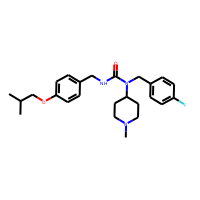
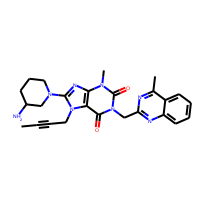
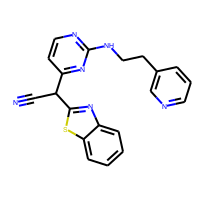
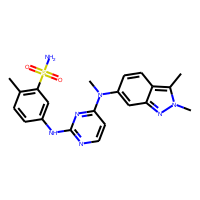
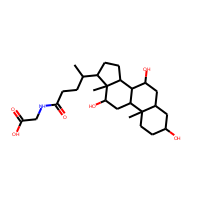

In [13]:
df.head()

In [14]:
DataStructs.FingerprintSimilarity(macc_fps[31],macc_fps[2])

0.4

#### MACCs Binary matrix

In [12]:
all_drugs = list(df["PCIDs"])

In [17]:
macc_df = pd.DataFrame(columns = all_drugs)
macc_df.head()

,10071196,10096344,10109823,10113978,10140,10152654,10168,10172943,10182969,10184653,101989,10204,10219702,10235,10275777,10286159,10288191,1030,10341154,10379137,104741,104758,104842,104850,104865,10531,1054,10621,10660,10770,107807,10783,107970,108092,108143,1102,110634,110635,11167602,11175137,11213558,11224409,11256587,11282283,11289,1130,11304743,11338033,11351021,11434515,114829,11485656,11494412,11519070,11524144,115348,115368,11556711,11560787,11626560,11640390,11656518,11658860,11683,11703255,11705608,11707110,11712649,11719003,11749858,1176,119031,119032,119182,119373,11949646,119570,11960529,11973736,11978813,119828,1201549,12035,121396,121891,121892,122077,122335,122623,1236,123600,123606,123618,123619,123631,123683,123879,124087,125017,125564,12560,126565,126941,127894,128919,129211,129228,13109,131682,132519,133017,13342,134018,134780,1349907,1355,137,13711,13791,146570,148121,148184,148195,149096,14925,150311,151075,151170,151171,151172,151194,15209,152946,15387,154257,154417,154575,1547484,1548887,1548942,1548943,1548953,1549000,1549008,15547703,15548,155774,156391,156419,156422,158758,158781,159324,15951529,159594,159603,16004692,160355,1609,16220172,16222096,16231,16362,164522,1649,16490,166558,16666708,16678941,16741,16741245,1676,1694,16960,171548,1720,1727,174174,175805,176167,176407,176870,1775,1779,180559,187,1893,19001,1935,19493,1978,1981,1983,1986,1989,202225,20279,20299,2082,2083,2088,208898,208901,208902,208908,2092,2094,2099,210332,21109,2118,2119,2130,213046,21307,2141,2145,2146,2153,2157,2159,2160,2161,2162,216237,216239,216326,21700,2179,2182,2187,219078,219104,2200,22049997,2206,221493,222528,22297,223368,2244,2247,2249,2265,2266,2267,2284,2315,2333,2337,2343,2351,2353,2354,23633604,23635314,2366,2369,237,2370,23725625,2375,2378,2381,23897,2396,2405,24180719,243,2431,2435,24360,2446,2471,2474,2477,24771867,24775005,24776445,24779724,247839,2481,24812758,24821094,24826799,2484,24856436,24872560,24875320,24889392,24965990,24978538,24995524,25074470,25102847,25126798,2519,2520,25210493,25295,253602,2540,2541,25419,2554,2564,2576,2581,2583,2585,2608,26248,2662,2663,2678,26879,26934,26987,2710,2712,2719,2720,2724385,2725,2726,2732,2733,2733526,2749,2750,275196,2754,2756,2763,2764,2765,27661,2769,2771,27812,2783,2784,2787,2794,2796,2801,2802,2803,2812,2818,28417,285033,28693,2882,2895,2905,2907,2910,29327,2966,2973,2987927,2993,2995,3000322,3001028,3001055,3005573,3009,3009355,3016,3019,3025,3025986,3032285,30323,3033,3033637,3033769,3033825,3034010,3036703,3036780,3038,3038522,3038525,3042,3052,3052776,3055,3059,3062316,3064778,30668,3081361,3100,3103,3105,31072,3108,31101,3114,3117,3121,31275,31307,3132,31401,3151,3152,3156,3157,3162,3168,31703,3180,3182,3194,3198,3202,3219,3220,3229,323,3241,3278,32798,3290,3291,3292,3305,3308,3314,3331,3332,3333,3341,3342,3342298,3343,3348,3354,3356,33572,33624,33625,3366,3371,3372,3373,33741,338,3385,33887,3394,3396,34040,3406,34312,3440,3446,3447,3455,3463,34633,3475,3476,3478,3488,3494,3503,3518,3519,35370,3540,3542,3547,3559,3598,3606,36314,3637,3639,36462,3647,3652,3657,3658,3671,3672,3675,3676,3678,36811,3690,3696,3698,369976,3702,3715,37393,3744,37542,3759,3762,3779,3784,3792,3822,3825,3826,3827,38521,387447,3878,3883,38853,38945,3899,3899541,3902,39042,39147,39186,392622,39468,3948,3955,39562,3957,3958,3961,3964,3965,3973,39765,39912,3998,39981,400769,4011,4020,4032,4034,4037,4044,4054,4055,4057,4060,4062,40632,40692,4075,4078,40839,4086,4097,4100,4107,41214,4122,4139,4167,4168,41693,4170,4171,4173,4174,41774,4178,41781,4184,41867,4189,4192,4195,4197,4199,4201,4205,4211,4212,4235,4236,4260,42611257,42642645,42642648,42890,43008,4362,4369359,4369491,4369524,4380,43815,439501,439530,4409,44093,44112,441140,4413,441314,44205240,44259,443118,4436,443872,443879,443943,444,444008,444036,44462760,444732,444795,444899,4449,445070,445154,445319,445354,445580,4456,445643,445713,446155,446156,446157,446284,446313,446541,446916,447043,447277,4474,447905,447912,447966

In [61]:
for index, row in df.iterrows():
    drug = row.loc['PCIDs']
    macc = macc_fps[index]
    for i in range(len(macc)):
        if macc[i] == 1:
            macc_df.loc[i,drug]= 1
        elif macc[i] == 0:
            macc_df.loc[i,drug]= 0

In [62]:
macc_df.head()

10071196   10096344   10109823   10113978   10140      10152654   10168      10172943   10182969   10184653   101989     10204      10219702   10235      10275777   10286159   10288191   1030       10341154   10379137   104741     104758     104842     104850     104865     10531      1054       10621      10660      10770      107807     10783      107970     108092     108143     1102       110634     110635     11167602   11175137   11213558   11224409   11256587   11282283   11289      1130       11304743   11338033   11351021   11434515   114829     11485656   11494412   11519070   11524144   115348     115368     11556711   11560787   11626560   11640390   11656518   11658860   11683      11703255   11705608   11707110   11712649   11719003   11749858   1176       119031     119032     119182     119373     11949646   119570     11960529   11973736   11978813   119828     1201549    12035      121396     121891     121892     122077     122335     122623     1236       123600     123606     123618     123619     123631     123683     123879     124087     125017     125564     12560      126565     126941     127894     128919     129211     129228     13109      131682     132519     133017     13342      134018     134780     1349907    1355       137        13711      13791      146570     148121     148184     148195     149096     14925      150311     151075     151170     151171     151172     151194     15209      152946     15387      154257     154417     154575     1547484    1548887    1548942    1548943    1548953    1549000    1549008    15547703   15548      155774     156391     156419     156422     158758     158781     159324     15951529   159594     159603     16004692   160355     1609       16220172   16222096   16231      16362      164522     1649       16490      166558     16666708   16678941   16741      16741245   1676       1694       16960      171548     1720       1727       174174     175805     176167     176407     176870     1775       1779       180559     187        1893       19001      1935       19493      1978       1981       1983       1986       1989       202225     20279      20299      2082       2083       2088       208898     208901     208902     208908     2092       2094       2099       210332     21109      2118       2119       2130       213046     21307      2141       2145       2146       2153       2157       2159       2160       2161       2162       216237     216239     216326     21700      2179       2182       2187       219078     219104     2200       22049997   2206       221493     222528     22297      223368     2244       2247       2249       2265       2266       2267       2284       2315       2333       2337       2343       2351       2353       2354       23633604   23635314   2366       2369       237        2370       23725625   2375       2378       2381       23897      2396       2405       24180719   243        2431       2435       24360      2446       2471       2474       2477       24771867   24775005   24776445   24779724   247839     2481       24812758   24821094   24826799   2484       24856436   24872560   24875320   24889392   24965990   24978538   24995524   25074470   25102847   25126798   2519       2520       25210493   25295      253602     2540       2541       25419      2554       2564       2576       2581       2583       2585       2608       26248      2662       2663       2678       26879      26934      26987      2710       2712       2719       2720       2724385    2725       2726       2732       2733       2733526    2749       2750       275196     2754       2756       2763       2764       2765       27661      2769       2771       27812      2783       2784       2787       2794       2796       2801       2802       2803       2812       2818       28417      285033     28693      2882       2895       2905       2907       2910       29327      2966       2973       2987927    2993       2995   

In [71]:
filename = 'Output/MACCs_BMatrix_map_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
macc_df.to_csv(filename, sep='\t', compression='gzip')

## Morgan Fingerprints

In [52]:
morg_fps = [AllChem.GetMorganFingerprintAsBitVect(x,2) for x in df['Molecule']]
print(len(morg_fps),len(df['Molecule']))

6592 6592


In [53]:
# test_df = pd.DataFrame(0,index = all_drugs,columns = range(len(morg_fps[0])))
# test_df = pd.DataFrame(columns = range(len(morg_fps[0])))
# test_df.append(morg_fps[0])

In [61]:
test_df.head()

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
10071196,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
10096344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10109823,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10113978,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10140,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [60]:
test_df = pd.DataFrame(np_fps, index = all_drugs)

In [42]:
morg_fps[0]

In [44]:
np.zeros((1,))

array([0.])

In [67]:
DataStructs.DiceSimilarity(morg_fps[214],morg_fps[392])

0.1643835616438356

#### Morgan Binary Matrix

In [143]:
np_fps = []
for fp in morg_fps:
  arr = np.zeros((1,))
  DataStructs.ConvertToNumpyArray(fp, arr)
  np_fps.append(arr)

morg_df = pd.DataFrame(np_fps, index = all_drugs)

10071196   10096344   10109823   10113978   10140      10152654   10168      10172943   10182969   10184653   101989     10204      10219702   10235      10275777   10286159   10288191   1030       10341154   10379137   104741     104758     104842     104850     104865     10531      1054       10621      10660      10770      107807     10783      107970     108092     108143     1102       110634     110635     11167602   11175137   11213558   11224409   11256587   11282283   11289      1130       11304743   11338033   11351021   11434515   114829     11485656   11494412   11519070   11524144   115348     115368     11556711   11560787   11626560   11640390   11656518   11658860   11683      11703255   11705608   11707110   11712649   11719003   11749858   1176       119031     119032     119182     119373     11949646   119570     11960529   11973736   11978813   119828     1201549    12035      121396     121891     121892     122077     122335     122623     1236       123600     123606     123618     123619     123631     123683     123879     124087     125017     125564     12560      126565     126941     127894     128919     129211     129228     13109      131682     132519     133017     13342      134018     134780     1349907    1355       137        13711      13791      146570     148121     148184     148195     149096     14925      150311     151075     151170     151171     151172     151194     15209      152946     15387      154257     154417     154575     1547484    1548887    1548942    1548943    1548953    1549000    1549008    15547703   15548      155774     156391     156419     156422     158758     158781     159324     15951529   159594     159603     16004692   160355     1609       16220172   16222096   16231      16362      164522     1649       16490      166558     16666708   16678941   16741      16741245   1676       1694       16960      171548     1720       1727       174174     175805     176167     176407     176870     1775       1779       180559     187        1893       19001      1935       19493      1978       1981       1983       1986       1989       202225     20279      20299      2082       2083       2088       208898     208901     208902     208908     2092       2094       2099       210332     21109      2118       2119       2130       213046     21307      2141       2145       2146       2153       2157       2159       2160       2161       2162       216237     216239     216326     21700      2179       2182       2187       219078     219104     2200       22049997   2206       221493     222528     22297      223368     2244       2247       2249       2265       2266       2267       2284       2315       2333       2337       2343       2351       2353       2354       23633604   23635314   2366       2369       237        2370       23725625   2375       2378       2381       23897      2396       2405       24180719   243        2431       2435       24360      2446       2471       2474       2477       24771867   24775005   24776445   24779724   247839     2481       24812758   24821094   24826799   2484       24856436   24872560   24875320   24889392   24965990   24978538   24995524   25074470   25102847   25126798   2519       2520       25210493   25295      253602     2540       2541       25419      2554       2564       2576       2581       2583       2585       2608       26248      2662       2663       2678       26879      26934      26987      2710       2712       2719       2720       2724385    2725       2726       2732       2733       2733526    2749       2750       275196     2754       2756       2763       2764       2765       27661      2769       2771       27812      2783       2784       2787       2794       2796       2801       2802       2803       2812       2818       28417      285033     28693      2882       2895       2905       2907       2910       29327      2966       2973       2987927    2993       2995   

In [149]:
# for index, row in df.iterrows():
#     drug = row.loc['PCIDs']
#     morg = morg_fps[index]
#     for i in range(len(morg)):
#         if morg[i] == 1:
#             morgan_df.loc[i,drug]= morg[i]
#     if index % 500 == 0:
#         print (index)

0


KeyboardInterrupt: 

In [150]:
morg_df

344

In [ ]:
filename = 'Output/Morgan_BMatrix_map_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
morgan_df.to_csv(filename, sep='\t', compression='gzip')

## Avalon Fingerprints

In [ ]:
avalon_fps = [Avalon.pyAvalonTools.GetAvalonFP(x) for x in df['Molecule']]

In [ ]:
print(avalon_fps[:5])

In [ ]:
# df.loc[:,'Avalon'] = pd.Series(avalon_fps, index = df.index)

In [ ]:
df.head()

In [ ]:
len(avalon_fps[378])

#### Avalon Binary Matrix

In [ ]:
avalon_df = pd.DataFrame(columns = all_drugs)
avalon_df.head()

In [ ]:
for index, row in df.iterrows():
    drug = row.loc['PCIDs']
    avalon = avalon_fps[index]
    for i in range(len(avalon)):
        if avalon[i] == 1:
            avalon_df.loc[i,drug]= 1
        elif avalon[i] == 0:
            avalon_df.loc[i,drug]= 0

In [ ]:
filename = 'Output/Avalon_BMatrix_map_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
avalon_df.to_csv(filename, sep='\t', compression='gzip')

## Atom Pairs Fingerprints

In [57]:
# atom_pairs_fps = [Pairs.GetAtomPairFingerprintAsBitVect(x) for x in df['Molecule']]
atom_pairs_fps = [Pairs.GetAtomPairFingerprint(x) for x in df['Molecule']]

In [58]:
atom_pairs_fps[:5]

In [22]:
atom_pairs_df = pd.DataFrame(columns = all_drugs)
atom_pairs_df.head()

,10071196,10096344,10109823,10113978,10140,10152654,10168,10172943,10182969,10184653,101989,10204,10219702,10235,10275777,10286159,10288191,1030,10341154,10379137,104741,104758,104842,104850,104865,10531,1054,10621,10660,10770,107807,10783,107970,108092,108143,1102,110634,110635,11167602,11175137,11213558,11224409,11256587,11282283,11289,1130,11304743,11338033,11351021,11434515,114829,11485656,11494412,11519070,11524144,115348,115368,11556711,11560787,11626560,11640390,11656518,11658860,11683,11703255,11705608,11707110,11712649,11719003,11749858,1176,119031,119032,119182,119373,11949646,119570,11960529,11973736,11978813,119828,1201549,12035,121396,121891,121892,122077,122335,122623,1236,123600,123606,123618,123619,123631,123683,123879,124087,125017,125564,12560,126565,126941,127894,128919,129211,129228,13109,131682,132519,133017,13342,134018,134780,1349907,1355,137,13711,13791,146570,148121,148184,148195,149096,14925,150311,151075,151170,151171,151172,151194,15209,152946,15387,154257,154417,154575,1547484,1548887,1548942,1548943,1548953,1549000,1549008,15547703,15548,155774,156391,156419,156422,158758,158781,159324,15951529,159594,159603,16004692,160355,1609,16220172,16222096,16231,16362,164522,1649,16490,166558,16666708,16678941,16741,16741245,1676,1694,16960,171548,1720,1727,174174,175805,176167,176407,176870,1775,1779,180559,187,1893,19001,1935,19493,1978,1981,1983,1986,1989,202225,20279,20299,2082,2083,2088,208898,208901,208902,208908,2092,2094,2099,210332,21109,2118,2119,2130,213046,21307,2141,2145,2146,2153,2157,2159,2160,2161,2162,216237,216239,216326,21700,2179,2182,2187,219078,219104,2200,22049997,2206,221493,222528,22297,223368,2244,2247,2249,2265,2266,2267,2284,2315,2333,2337,2343,2351,2353,2354,23633604,23635314,2366,2369,237,2370,23725625,2375,2378,2381,23897,2396,2405,24180719,243,2431,2435,24360,2446,2471,2474,2477,24771867,24775005,24776445,24779724,247839,2481,24812758,24821094,24826799,2484,24856436,24872560,24875320,24889392,24965990,24978538,24995524,25074470,25102847,25126798,2519,2520,25210493,25295,253602,2540,2541,25419,2554,2564,2576,2581,2583,2585,2608,26248,2662,2663,2678,26879,26934,26987,2710,2712,2719,2720,2724385,2725,2726,2732,2733,2733526,2749,2750,275196,2754,2756,2763,2764,2765,27661,2769,2771,27812,2783,2784,2787,2794,2796,2801,2802,2803,2812,2818,28417,285033,28693,2882,2895,2905,2907,2910,29327,2966,2973,2987927,2993,2995,3000322,3001028,3001055,3005573,3009,3009355,3016,3019,3025,3025986,3032285,30323,3033,3033637,3033769,3033825,3034010,3036703,3036780,3038,3038522,3038525,3042,3052,3052776,3055,3059,3062316,3064778,30668,3081361,3100,3103,3105,31072,3108,31101,3114,3117,3121,31275,31307,3132,31401,3151,3152,3156,3157,3162,3168,31703,3180,3182,3194,3198,3202,3219,3220,3229,323,3241,3278,32798,3290,3291,3292,3305,3308,3314,3331,3332,3333,3341,3342,3342298,3343,3348,3354,3356,33572,33624,33625,3366,3371,3372,3373,33741,338,3385,33887,3394,3396,34040,3406,34312,3440,3446,3447,3455,3463,34633,3475,3476,3478,3488,3494,3503,3518,3519,35370,3540,3542,3547,3559,3598,3606,36314,3637,3639,36462,3647,3652,3657,3658,3671,3672,3675,3676,3678,36811,3690,3696,3698,369976,3702,3715,37393,3744,37542,3759,3762,3779,3784,3792,3822,3825,3826,3827,38521,387447,3878,3883,38853,38945,3899,3899541,3902,39042,39147,39186,392622,39468,3948,3955,39562,3957,3958,3961,3964,3965,3973,39765,39912,3998,39981,400769,4011,4020,4032,4034,4037,4044,4054,4055,4057,4060,4062,40632,40692,4075,4078,40839,4086,4097,4100,4107,41214,4122,4139,4167,4168,41693,4170,4171,4173,4174,41774,4178,41781,4184,41867,4189,4192,4195,4197,4199,4201,4205,4211,4212,4235,4236,4260,42611257,42642645,42642648,42890,43008,4362,4369359,4369491,4369524,4380,43815,439501,439530,4409,44093,44112,441140,4413,441314,44205240,44259,443118,4436,443872,443879,443943,444,444008,444036,44462760,444732,444795,444899,4449,445070,445154,445319,445354,445580,4456,445643,445713,446155,446156,446157,446284,446313,446541,446916,447043,447277,4474,447905,447912,447966

In [40]:
for index, row in df.iterrows():
    drug = row.loc['PCIDs']
    ap = atom_pairs_fps[index]
    for i in range(len(ap)):
        if ap[i] == 1:
            atom_pairs_df.loc[i,drug]= 1
        elif ap[i] == 0:
            atom_pairs_df.loc[i,drug]= 0
    if index ==2:
        break

KeyboardInterrupt: 

In [42]:
i

4113

In [60]:
atom_pairs_fps[3982]

In [56]:
DataStructs.cDataStructs.SparseBitVect.GetNumOnBits(atom_pairs_fps[2282])

144

In [39]:
atom_pairs_df.shape

(167, 6592)

In [27]:
filename = 'Output/SMILES_fingerprints_map_%s.tsv.zip'% str(datetime.date.today())[0:7].replace('-', '_')
df.to_csv(filename, sep='\t', compression='gzip')